# Gerador de Imagens
***

## 1. Importação dos Pacotes
***

In [11]:
import numpy as np # pacote de procedimentos numéricos
import skimage.morphology as sk # pacote de morfologia matemática
import matplotlib.pyplot as plt # pacote de visualização gráfica
import pandas as pd # pacote de gerenciamento de dataframes
from PIL import Image # pacote de operações com imagens

## 2. Funções para Gerar Dígitos em Braille
***

In [10]:
def element_generator(radius = 4, state = True):
    ''''
    gera um furo (elemento) do caractere em braille

    Args:
        radius (int) -- raio do furo
        state (bool) -- indica se há ou não furo na imagem

    Return:
        element (array) -- retornar um elemento do braille
    '''

    element = sk.disk(radius)

    if state == True:
        element[0, element.shape[1] // 2] = 0
        element[-1, element.shape[1] // 2] = 0
        element[element.shape[0] // 2, 0] = 0
        element[element.shape[0] // 2, -1] = 0
    else:
        element = np.zeros(element.shape, dtype='uint8')
    
    return element 

In [11]:
def zero_padding(image, width = 1):
    '''
    adiciona zeros na borda de um array

    Args:
        image (array) -- array da imagem
        width (int) -- espessura em pixels da borda
    
    Return:
        image (array) -- array da imagem com borda adicionada
    '''

    image = np.pad(image, pad_width=width, mode='constant')

    return image 

In [12]:
def reshape_encoded_image(flatten):
    '''
    cria uma array com o formato do gabarito de furos em braille

    Args:
        flatten (list) -- lista codificada do estado de furo do caractere

    Return:
        encoded_image (array) -- array do estado de furo do caractere
    '''

    encoded_image = np.array(flatten, dtype='uint8')
    encoded_image = encoded_image.reshape(3,2)
    

    return encoded_image

In [13]:
def make_caractere(encoded_image, radius = 4, pad_width = 1):
    '''
    gera uma imagem do caractere em braille

    Args:
        encoded_image (array) -- array com o estado de furos do dígito
        radius (int) -- raio do furo
        pad_width (int) - espessura em pixels da borda dos elementos
    
    Return:
        caractere (array) -- imagem do caractere em braille
    '''
    
    caractere = [[np.concatenate((element_generator(radius, encoded_image[0][0]), 
                                  element_generator(radius, encoded_image[0][1])), axis=1)],
                 [np.concatenate((element_generator(radius, encoded_image[1][0]), 
                                  element_generator(radius, encoded_image[1][1])), axis=1)],
                 [np.concatenate((element_generator(radius, encoded_image[2][0]), 
                                  element_generator(radius, encoded_image[2][1])), axis=1)]]

    caractere = np.concatenate((np.squeeze(caractere[0]),np.squeeze(caractere[1]), np.squeeze(caractere[2])))

    caractere = zero_padding(caractere, width=pad_width)
    
    return caractere

In [38]:
def string_to_list(flatten_list):
    '''
    correção de conversão da string para a lista da codificação dos caracteres em braille

    Args:
        flatten_list (string) -- lista de codificação do caractere em string

    Returns:
        flatten_list (list) -- lista de codificação do caractere
    '''

    for i in range(0, len(flatten_list)):

        aux_list = list()
        flatten_list[i] = flatten_list[i].replace('[', '').replace(']', '').replace(',', '')
        aux_list.append(int(flatten_list[i].replace('[', '').replace(']', '').replace(',', '')[0:1]))
        aux_list.append(int(flatten_list[i].replace('[', '').replace(']', '').replace(',', '')[1:2]))
        aux_list.append(int(flatten_list[i].replace('[', '').replace(']', '').replace(',', '')[2:3]))
        aux_list.append(int(flatten_list[i].replace('[', '').replace(']', '').replace(',', '')[3:4]))
        aux_list.append(int(flatten_list[i].replace('[', '').replace(']', '').replace(',', '')[4:5]))
        aux_list.append(int(flatten_list[i].replace('[', '').replace(']', '').replace(',', '')[5:6]))
        flatten_list[i] = aux_list

    return flatten_list

In [55]:
def dict_codification(dataframe_path = 'braille-pt-br.csv', usecols = ['Codificacao', 'Rotulo']):
    '''
    cria um dicionário com a codificação do alfabeto em braille

    Args:
        dataframe_path (string) -- caminho do arquivo csv com os dados de codificação
    
    Return:
        dict_elements (dict) -- codificação dos dígitos em um dicionário  
    '''

    dataframe = pd.read_csv(dataframe_path, delimiter = ',', usecols = usecols)

    codificacao = string_to_list(list(dataframe['Codificacao']))
    rotulo = list(dataframe['Rotulo'])

    return dict(zip(rotulo, codificacao))

In [113]:
def caractere_generator(caractere_str, radius = 4, pad_width = 4):
    '''
    gera um caractere em braille a partir de um array codificado

    Args:
        caractere_str (string) -- caractere a ser gerado em braille
        radius (int) -- raio do elemento do caractere
        pad_width (int) -- espessura da borda do elemento
    
    Return:
        caractere (array) -- imagem do caractere
    '''
    if caractere_str == ' ':
        caractere = make_caractere(np.array([[0,0], [0,0], [0,0]]), radius, pad_width)
    else:
        encoded_image = reshape_encoded_image(dict_codification()[caractere_str])
        caractere = make_caractere(encoded_image, radius, pad_width)

    return caractere

## 3. Funções para Gerar as Imagens em Braille
***

In [103]:
def concatenate_caractere(list_caractere, axis = 1):
    '''
    função que concatena linhas e colunas de dígitos em braille

    Args:
        list_caractere (list) -- lista de arrays com os caracteres em braille
        axis (int) -- eixo de concatenação das imagens
    
    return:
        image_block (array) -- array com os dígitos concatenador
    '''

    for i in range(0, len(list_caractere)):

        if i == 0:
            image_block = list_caractere[i]
        else:
            image_block = np.concatenate((image_block, list_caractere[i]), axis = axis)
        
    return image_block



In [111]:
def string_to_line_braille(text_str):
    '''
    converte texto em uma imagem em linha de braille

    Args:
        text_str (str) -- string de texto
    
    Return:
        line_image (array) -- imagem do texto em braille
    '''

    list_caractere = list()

    for caractere in text_str:
        list_caractere.append(caractere_generator(caractere))
    
    return concatenate_caractere(list_caractere, axis = 1)

In [120]:
def string_to_column_braille(list_texts):
    '''
    cria uma imagem em braille a partir de uma matriz de texto

    Args:
        list_text (list) -- lista com as linhas em braille

    Returns:
        image_braille (array) -- imagem em braille 
    '''

    line_array = list()
    for line in list_texts:
        line_array.append(string_to_line_braille(line))
    
    return concatenate_caractere(line_array, axis = 0)


## 4. Teste da Classe
***

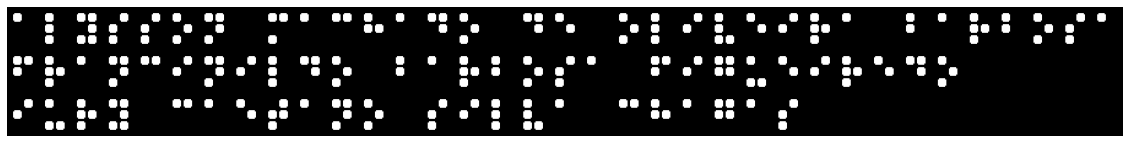

In [17]:
from image_generator import image_generator

gen_figure = image_generator()

text = ['alysson machado de oliveira barbosa', 
        'francinildo barbosa figueiredo     ',
        'iury caetano silva chagas          ']

plt.figure(figsize = (20, 10))
plt.imshow(gen_figure.string_to_column_braille(text), cmap = 'gray')
plt.axis('off')
image = Image.fromarray((gen_figure.string_to_column_braille(text) * 255).astype(np.uint8))
image.save('image.tiff')
#plt.savefig('image.tiff')